In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/kumarisurbhi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Data source: http://course1.winona.edu/bdeppa/FIN%20335/Datasets/US%20Liquor%20Sales.csv

# parse_dates converts the datetime column into datetime objects
# index_col assigns the column as the data frame's index
df = pd.read_csv(
    Path("../Resources/liquor_sales.csv"), parse_dates=True, index_col="datetime"
)

In [3]:
# Display top rows
df.head()

,month,liquor_sales
datetime,,
1980-01-01,1,480
1980-02-01,2,467
1980-03-01,3,514
1980-04-01,4,505
1980-05-01,5,534


Text(0, 0.5, 'Amount of sales')

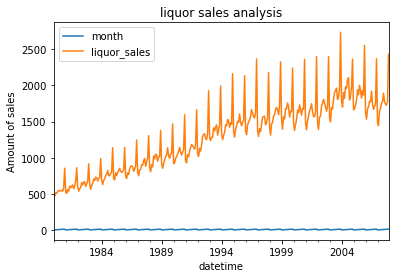

In [4]:
# Sales trend shows a multiplicative pattern
df.plot(title="liquor sales analysis")
plt.ylabel('Amount of sales')

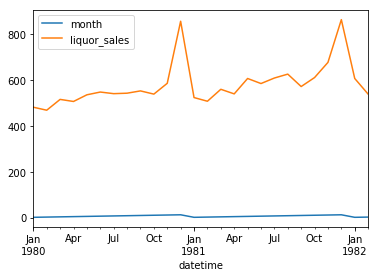

In [5]:
# Sales appear to spike during the holiday season
df[:26].plot()

In [10]:
# The time series data is decomposed into trend, seasonality, and residual(noise)
# With the noise removed, an upward trend across years and an annual cycle are shown.
decomposed = seasonal_decompose(df['liquor_sales'], model='multiplicative')
type(decomposed)

statsmodels.tsa.seasonal.DecomposeResult

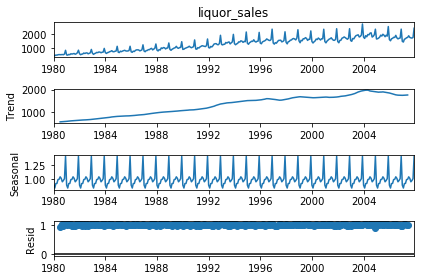

In [11]:
decomposed.plot();

In [13]:
dir(decomposed)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_observed',
 '_resid',
 '_seasonal',
 '_trend',
 '_weights',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend',
 'weights']

In [17]:
decomposed2.trend.tail()

datetime
2007-08-01   NaN
2007-09-01   NaN
2007-10-01   NaN
2007-11-01   NaN
2007-12-01   NaN
Name: trend, dtype: float64

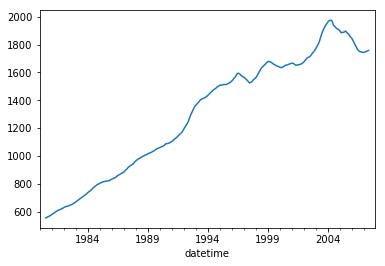

In [18]:
decomposed2.trend.plot()

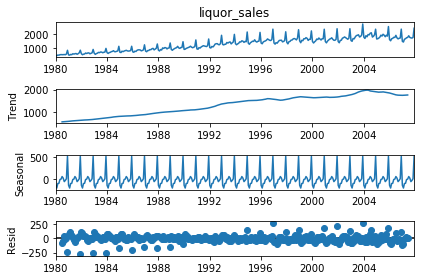

In [14]:
decomposed2 = seasonal_decompose(df['liquor_sales'], model='additive')
decomposed2.plot();